<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Abstract" data-toc-modified-id="Abstract-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Abstract</a></span></li><li><span><a href="#Import-Libraries-and-dataframe" data-toc-modified-id="Import-Libraries-and-dataframe-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Libraries and dataframe</a></span></li><li><span><a href="#Visualization:-Prices-per-oz-vs-Rating" data-toc-modified-id="Visualization:-Prices-per-oz-vs-Rating-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualization: Prices per oz vs Rating</a></span></li><li><span><a href="#Visualization:-Distribution-of-Ratings" data-toc-modified-id="Visualization:-Distribution-of-Ratings-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualization: Distribution of Ratings</a></span></li><li><span><a href="#Visualization:-Agtron-v-Rating" data-toc-modified-id="Visualization:-Agtron-v-Rating-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Visualization: Agtron v Rating</a></span></li><li><span><a href="#Correlation-matrix" data-toc-modified-id="Correlation-matrix-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Correlation matrix</a></span></li><li><span><a href="#Result" data-toc-modified-id="Result-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Result</a></span></li><li><span><a href="#Visualization:-Maps" data-toc-modified-id="Visualization:-Maps-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Visualization: Maps</a></span><ul class="toc-item"><li><span><a href="#Basic-World-Map" data-toc-modified-id="Basic-World-Map-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Basic World Map</a></span></li><li><span><a href="#Better-World-Map" data-toc-modified-id="Better-World-Map-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Better World Map</a></span></li><li><span><a href="#adding-coffee-counts-to-world-map" data-toc-modified-id="adding-coffee-counts-to-world-map-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>adding coffee counts to world map</a></span></li><li><span><a href="#Mean-rating-for-each-country" data-toc-modified-id="Mean-rating-for-each-country-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Mean rating for each country</a></span></li><li><span><a href="#test-series-to-add-to-world-df" data-toc-modified-id="test-series-to-add-to-world-df-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>test series to add to world df</a></span></li><li><span><a href="#Total-number-of-growers-to-world-map" data-toc-modified-id="Total-number-of-growers-to-world-map-8.6"><span class="toc-item-num">8.6&nbsp;&nbsp;</span>Total number of growers to world map</a></span></li></ul></li><li><span><a href="#World-plot-with-number-of-coffee-growers" data-toc-modified-id="World-plot-with-number-of-coffee-growers-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>World plot with number of coffee growers</a></span><ul class="toc-item"><li><span><a href="#Attempt-to-get-rid-of-distortion" data-toc-modified-id="Attempt-to-get-rid-of-distortion-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Attempt to get rid of distortion</a></span></li></ul></li><li><span><a href="#Code-Holding" data-toc-modified-id="Code-Holding-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Code Holding</a></span></li></ul></div>

# Abstract

Purpose: The purpose of this file, visualizing_coffee_reviews, is to communicate important information about the coffee reviews dataset with the use of graphs, plots and maps.  The scraping and cleaning of the dataset was performed prior to visualization and can be found in scraping_coffee_reviews and cleaning_coffee_reviews.  

Findings: Several different types of graphs were created to show the relationship between a coffee rating and price, the distribution of ratings (tends towards a normal distribution), and a correlation matrix between the rating of a coffee and the scores.  And, most exciting, at the bottom of the notebook is a world map displaying in which countries the coffee beans where grown. 

Significance: The two most popular countries for growing coffee beans in these reviews are Kenya and Ethiopia. Also, when ratings were correlated with the numeric scores, the price was NOT one of the highest correlated features.  It was the 8th feature, behind all the others.

Conclusions: The rating a coffee receives is not a clear linear relationship with the price per ounnce. 

# Import Libraries and dataframe

In [75]:
import numpy as np 
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
from matplotlib import cm

plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import itertools
import statsmodels.api as sm
import operator

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

import time

import re
from bs4 import BeautifulSoup
import requests
import urllib.request
from urllib.request import Request, urlopen

import shapefile as shp
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [76]:
df = pd.read_csv('cleaned_coffee_reviews.csv')

In [77]:
df.columns
df = df.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'], axis=1)
df.head()

,Coffee Name,Roaster Name,Roaster Location,Coffee Origin,Rating,Roast Level,Review Date,Price,Agtron,Flavor,Body,Aroma,Aftertaste,Acidity,Bottom Line,Prices Per Oz,Agtron Whole,Agtron Ground,Coffee Country
0,Costa Rica Luis Campos Anaerobic,Revel Coffee,"Billings, Montana","Tarrazu, Costa Rica",94,Medium-Light,April 2020,$23.00/12 ounces,58/76,9,9,9,8,9.0,Enjoying this Costa Rica evokes the pleasures ...,1.92,58,76,Costa Rica
1,Colombia Granja La Esperanza Tres Dragones,PT's Coffee Roasting Co.,"Topeka, Kansas","Valle del Cauca growing region, Colombia",94,Medium-Light,April 2020,$23.50/12 ounces,60/74,9,9,9,8,9.0,A bombshell of a coffee with enough personalit...,1.96,60,74,Colombia
2,Colombia Finca La Loma Microlot,BeanFruit Coffee Co.,"Jackson, Mississippi","Huila, Colombia",94,Medium-Light,March 2020,$16.50/12 ounces,58/76,9,9,9,8,9.0,An exceptional Colombia cup with sweet and tar...,1.38,58,76,Colombia
3,Dukunde Kawa Rwanda,JBC Coffee Roasters,"Madison, Wisconsin","Musasa, Rwanda",93,Medium-Light,March 2020,$16.25/12 ounces,56/74,9,9,9,8,8.0,A deep yet delicate cup redolent with crisp fr...,1.35,56,74,Rwanda
4,Buzira Burundi Natural,JBC Coffee Roasters,"Madison, Wisconsin","Murutra, Kayanza Province, Burundi",92,Medium-Light,March 2020,$18.20/12 ounces,58/76,9,8,9,8,8.0,An exceptionally cleanly expressed natural-pro...,1.52,58,76,Burundi


In [4]:
# visualization ideas

#  1. Map of world with coffee origin plotted, w layers
#  https://gis.stackexchange.com/questions/198530/plotting-us-cities-on-a-map-with-matplotlib-and-basemap
#  2. done: price v rating
#  3. done: rating v agtron or agtron v origin
#  4. confusion matrix
#  5. done: Distribution of ratings
#  6. Feature importance

# https://towardsdatascience.com/walkthrough-mapping-basics-with-bokeh-and-geopandas-in-python-43f40aa5b7e9
# https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0

# Visualization: Prices per oz vs Rating

In [99]:
color = cm.inferno_r(np.linspace(.4, .8, 25))

Text(0, 0.5, 'Rating')

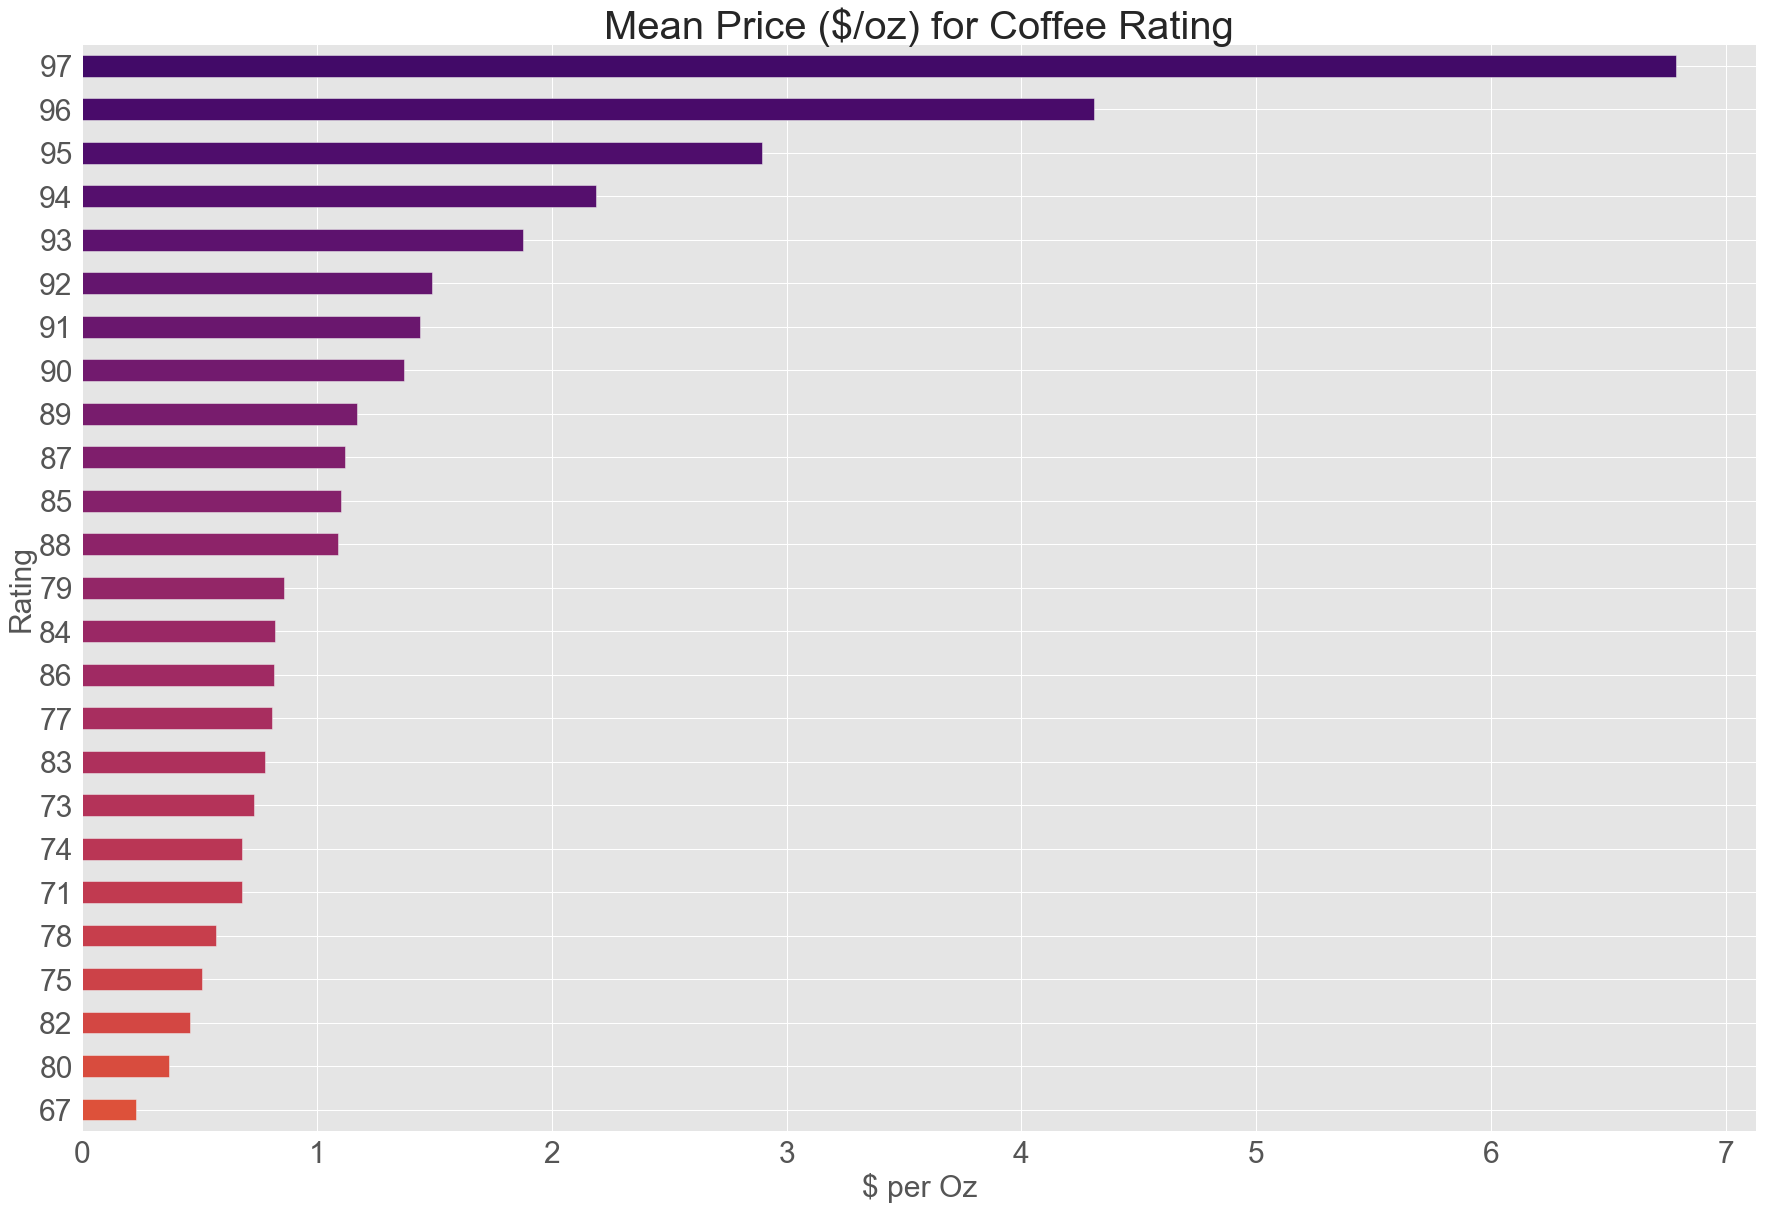

In [102]:
df.groupby(['Rating'])['Prices Per Oz'].mean().sort_values().plot(kind='barh', figsize=(30,20),color=color, fontsize =30)
plt.title('Mean Price ($/oz) for Coffee Rating', fontsize=40)
plt.xlabel("$ per Oz", fontsize=30)
plt.ylabel('Rating', fontsize=30)


In [6]:
# This is wrong, this is not mean price, but cumulative


# x = df['Rating']
# y = df['Prices Per Oz']
# fig = plt.figure(figsize=(20,10))

# plt.bar(x,y, color = '#1c3290', label = "")
# plt.xlabel("Rating", fontsize =25)
# plt.ylabel("$ per oz", fontsize = 25)
# plt.title("Coffee Ratings by Price", fontsize =35)
# plt.legend("")
# plt.show()

In [7]:
# This is wrong too

# x = df['Rating']
# y = df['']
# fig = plt.figure(figsize=(40,10))

# plt.bar(x,y, color = '#1c3290', label = "")
# plt.xlabel("", fontsize =25)
# plt.xticks(rotation=45)
# plt.ylabel("", fontsize = 25)
# plt.title("", fontsize =35)
# plt.legend("")
# plt.show()

# Visualization: Distribution of Ratings

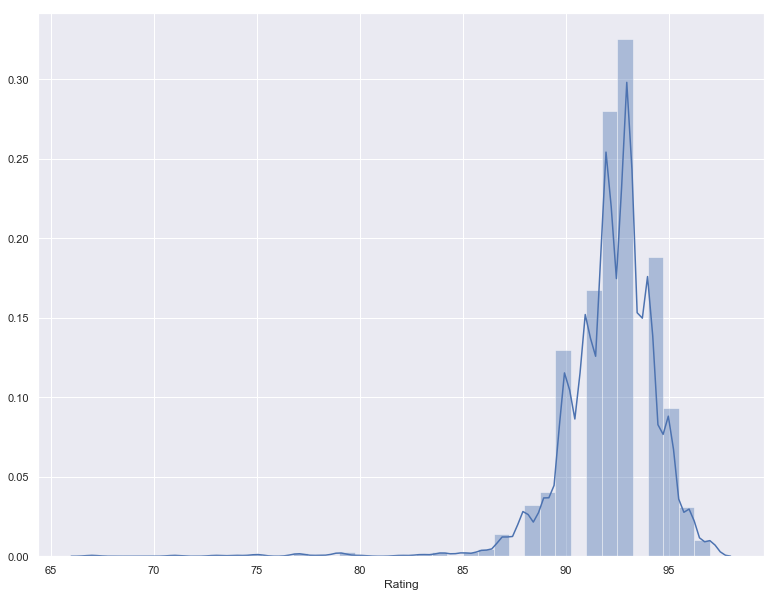

In [8]:
sns.set(rc={'figure.figsize':(13,10)})
sns.distplot(df['Rating'], bins=40)
plt.show()

# Visualization: Agtron v Rating
It turns out that are some 0 values for Agtron Whole and that is not the case for Agtron Ground.  My assumption is that the value was forgotten to be included.  Instead of deleting that data, the Agtron Ground score is used instead.

In the scatter plot below, we see that there tends to be a linear regression between the Agtron score and the Rating score.

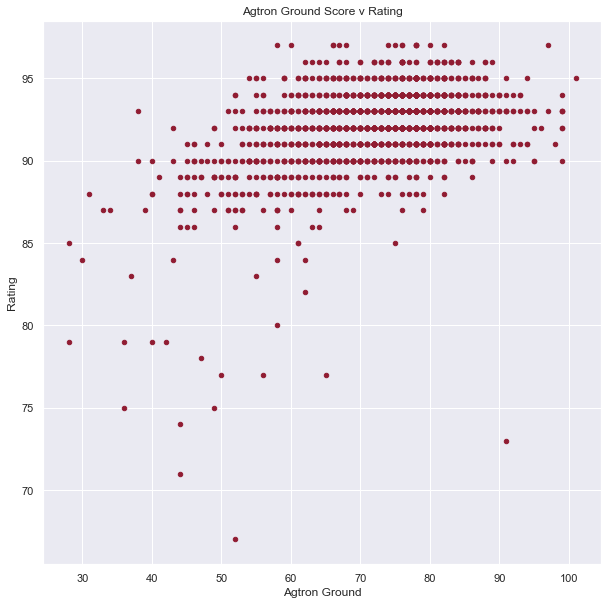

In [9]:
df.plot.scatter(x='Agtron Ground', y='Rating', c='#901c32', figsize=(10,10), title="Agtron Ground Score v Rating")

# Correlation matrix

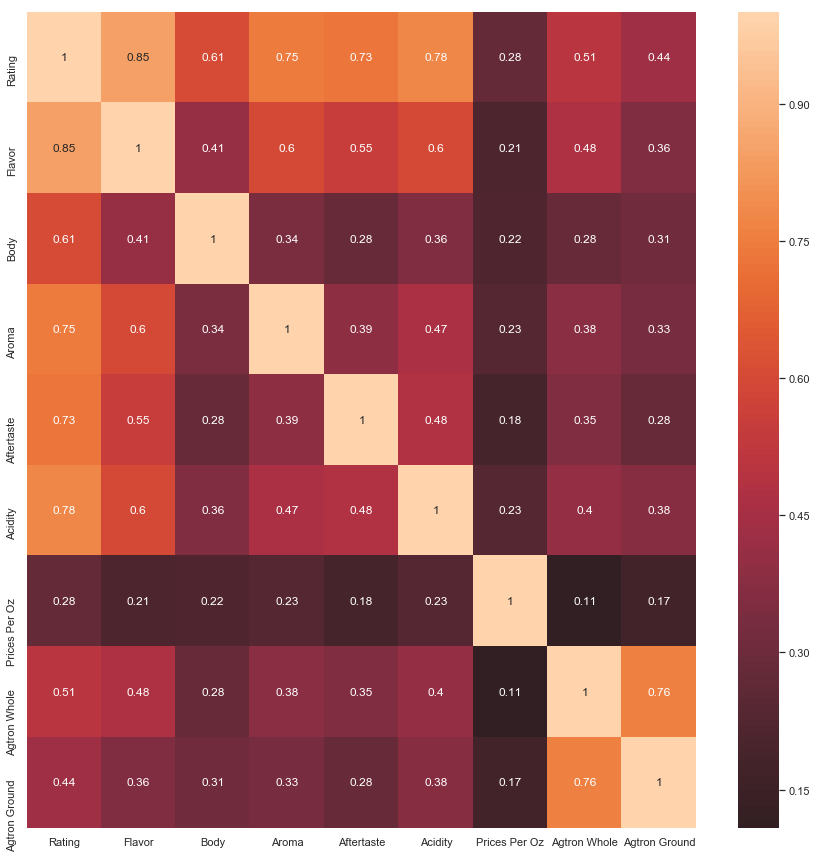

In [10]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(data=df.corr(), annot=True, center=0, ax=ax)

# Result
The highest value to correlate with the Rating is the Flavor score at 0.85, followed by the Acidity score, Aroma score and Aftertaste.  The least factor to correlate with the rate is price per oz (interesting!).

# Visualization: Maps

In [11]:
# !pip install pyshp

In [12]:
# !pip install descartes

In [13]:
# ! pip install geopandas

https://github.com/dodgy719/Geopandas-Intro/blob/master/shapefile.ipynb

## Basic World Map

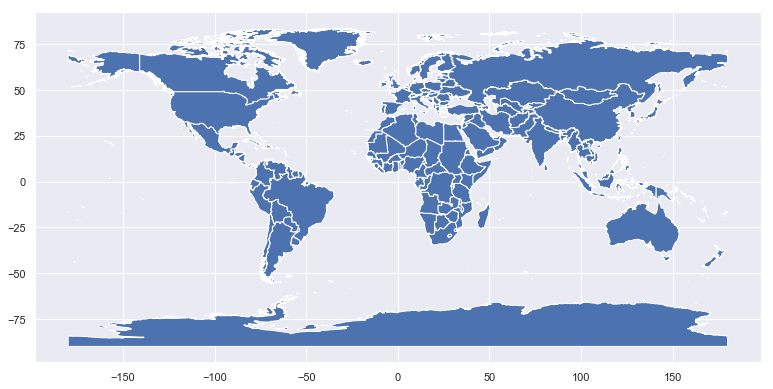

In [14]:
shape=gpd.read_file('Countries_WGS84.shp', figsize=(20,20))
shape.plot()

## Better World Map

In [15]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [16]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


In [17]:
print("Result", world['name'].str.contains('Greenland').sum())

Result 1


In [18]:
world['name'].value_counts()

South Africa                1
Haiti                       1
Iran                        1
Latvia                      1
Laos                        1
Zambia                      1
Sri Lanka                   1
Central African Rep.        1
Tanzania                    1
Macedonia                   1
Peru                        1
Mongolia                    1
China                       1
Kazakhstan                  1
Suriname                    1
Australia                   1
Gabon                       1
Mauritania                  1
Qatar                       1
Fiji                        1
Vietnam                     1
Angola                      1
Sierra Leone                1
Azerbaijan                  1
Malaysia                    1
Lebanon                     1
Cambodia                    1
Algeria                     1
Côte d'Ivoire               1
Israel                      1
                           ..
Myanmar                     1
Vanuatu                     1
Hungary   

In [19]:
# drop Antartica - no coffee growers there and map is funny
world = world.drop(world.index[159])

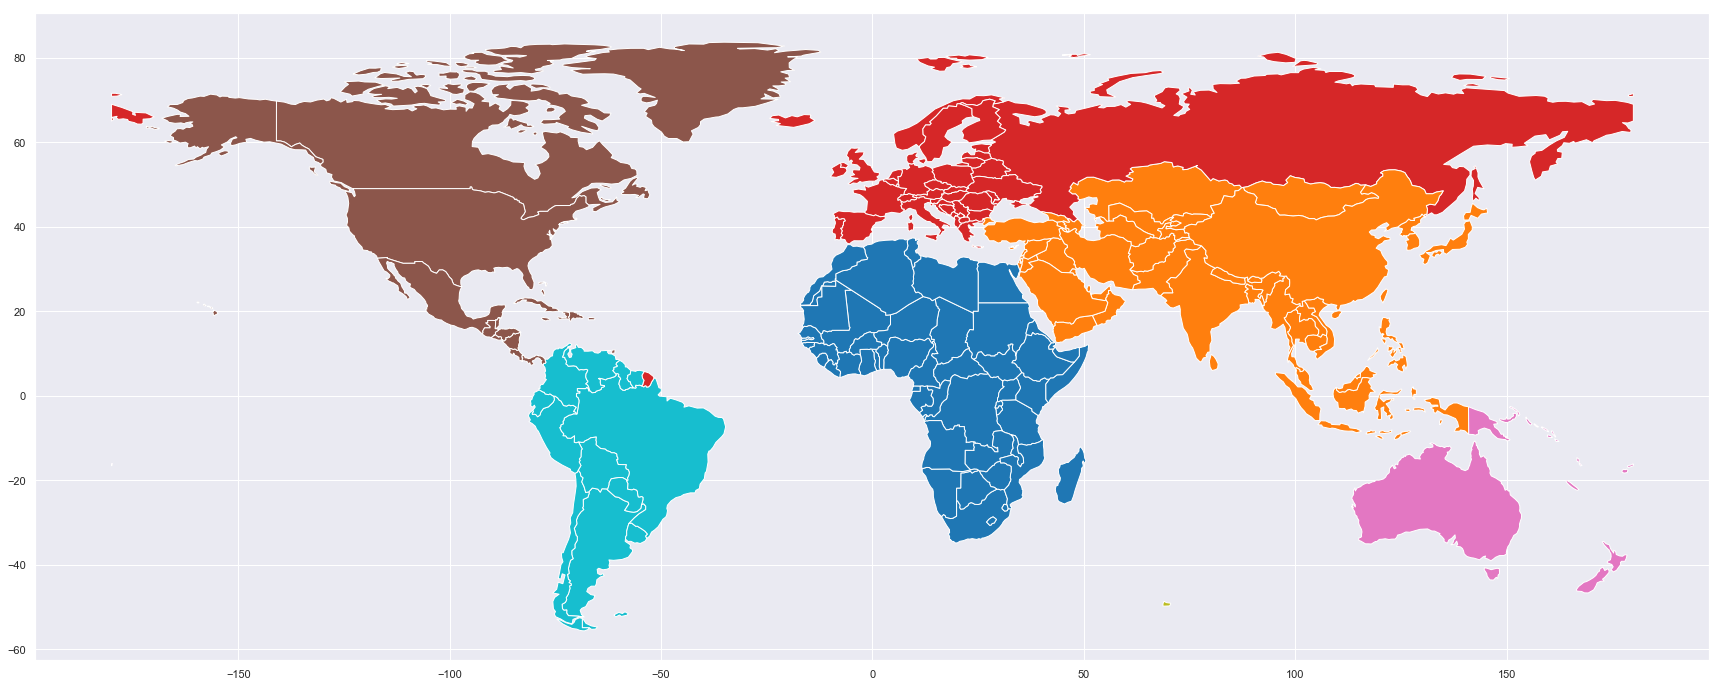

In [20]:
world.plot(figsize = (30,18), column = 'continent')

## adding coffee counts to world map

In [21]:
country_dict = df['Coffee Country'].value_counts()
country_dict

Ethiopia              441
Kenya                 272
Colombia              185
Guatemala             148
Panama                133
Indonesia             133
Costa Rica            118
World Blend            93
USA                    90
El Salvador            87
Rwanda                 70
undisclosed            54
Brazil                 48
Honduras               39
Burundi                38
Peru                   36
Nicaragua              36
Bolivia                23
Papua New Guinea       22
Ecuador                22
Mexico                 22
Tanzania               17
Congo                  14
Yemen                  10
Dominican Republic      7
Philippines             7
Zambia                  5
Uganda                  5
Thailand                3
Jamaica                 3
Haiti                   3
Puerto Rico             3
Zimbabwe                2
Nepal                   1
United Kingdom          1
Malaysia                1
Myanmar                 1
Madagascar              1
Malawi      

In [22]:
len(country_dict)

39

In [23]:
type(country_dict)

pandas.core.series.Series

In [24]:
# df['Coffee Country'].value_counts(normalize=True)

## Mean rating for each country

In [25]:
df.head(2)

,Coffee Name,Roaster Name,Roaster Location,Coffee Origin,Rating,Roast Level,Review Date,Price,Agtron,Flavor,Body,Aroma,Aftertaste,Acidity,Bottom Line,Prices Per Oz,Agtron Whole,Agtron Ground,Coffee Country
0,Costa Rica Luis Campos Anaerobic,Revel Coffee,"Billings, Montana","Tarrazu, Costa Rica",94,Medium-Light,April 2020,$23.00/12 ounces,58/76,9,9,9,8,9.0,Enjoying this Costa Rica evokes the pleasures ...,1.92,58,76,Costa Rica
1,Colombia Granja La Esperanza Tres Dragones,PT's Coffee Roasting Co.,"Topeka, Kansas","Valle del Cauca growing region, Colombia",94,Medium-Light,April 2020,$23.50/12 ounces,60/74,9,9,9,8,9.0,A bombshell of a coffee with enough personalit...,1.96,60,74,Colombia


In [26]:
grouped= df.groupby(['Coffee Country']).mean()
rating_group = grouped['Rating']
rating_group.head()

Coffee Country
Bolivia     91.608696
Brazil      91.416667
Burundi     92.236842
Colombia    91.400000
Congo       92.357143
Name: Rating, dtype: float64

In [27]:
type(rating_group)

pandas.core.series.Series

In [28]:
# check a few countries to be sure I found the mean rating for each country
# Zimbabwe and Malawi are correct

for i, country in df['Coffee Origin'].items():
    if "Malawi" in country:
        print(df.at[i, 'Rating'])

91


## test series to add to world df

In [29]:
# test_dict = {"Tanzania": 17, 'Papua New Guinea': 22, 'Indonesia': 134}

In [30]:
# test_series = pd.Series(test_dict)

In [31]:
# type(test_series)

In [32]:
# world['number of growers'] = 0

In [33]:
# world.name.nunique

In [34]:
# world.at[1,'number of growers'] = 17
# world.head(3)

In [35]:
# only prints number
# for key in country_dict:
#     print(key)

# https://www.geeksforgeeks.org/python-pandas-series-iteritems/
# https://stackoverflow.com/questions/30223099/using-iteritems-to-iterate-over-key-value-in-python-dictionary/30223423

# for key,value in test_series.iteritems(): 
#     name = key
#     quantity = value
#     print(name, quantity)
    
# Tanzania 17
# Papua New Guinea 22
# Indonesia 134

In [36]:
# This will add the dict of countries and the quantity of growers to the world dataframe

# for key, value in test_series.iteritems():
#     name = key
#     quantity = value
    
#     for i, country in world['name'].items():
#         if name == country:
#             print(name, quantity, i, country, 'old value: ', world.at[i, 'number of growers'])
#             world.at[i,'number of growers'] = quantity
#             print(name, quantity, i, country, 'new value: ', world.at[i, 'number of growers'])
#             print("")

# Tanzania 17 1 Tanzania old value:  17
# Tanzania 17 1 Tanzania new value:  17

# Papua New Guinea 22 7 Papua New Guinea old value:  0
# Papua New Guinea 22 7 Papua New Guinea new value:  22

# Indonesia 134 8 Indonesia old value:  0
# Indonesia 134 8 Indonesia new value:  134

In [37]:
# world.head(3)


# pop_est	continent	name	iso_a3	gdp_md_est	geometry	number of growers
# 0	920938	Oceania	Fiji	FJI	8374.0	(POLYGON ((180 -16.06713266364245, 180 -16.555...	0
# 1	53950935	Africa	Tanzania	TZA	150600.0	POLYGON ((33.90371119710453 -0.950000000000000...	17
# 2	603253	Africa	W. Sahara	ESH	906.5	POLYGON ((-8.665589565454809 27.65642588959236...	0

## Total number of growers to world map

In [38]:
# print("Result: ", world['name'].str.contains('Greenland').sum())
# print("Result: ", world['name'].str.contains('Australia').sum())

for i, country in world['name'].items():
    if "Greenland" in country:
        print("index: ", i, world.at[i, 'name']) 
        
for i, country in world['name'].items():
    if "Australia" in country:
        print("index: ", i, world.at[i, 'name']) 
        
for i, country in world['name'].items():
    if "Domini" in country:
        print("index: ", i, world.at[i, 'name']) 
        
for i, country in world['name'].items():
    if "America" in country:
        print("index: ", i, world.at[i, 'name']) 

index:  22 Greenland
index:  137 Australia
index:  17 Dominican Rep.
index:  4 United States of America


In [39]:
# world['name'] = world['name'].str.replace('Greenland','undisclosed')
# world['name'] = world['name'].str.replace('Australia','World Blend')
world['name'] = world['name'].str.replace('Dominican Rep.','Dominican Republic')
world['name'] = world['name'].str.replace('United States of America','USA')

In [40]:
# for i, country in world['name'].items():
#     if "Greenland" in country:
#         print("index: ", i, world.at[i, 'name']) 
        
# for i, country in world['name'].items():
#     if "Australia" in country:
#         print("index: ", i, world.at[i, 'name']) 

In [41]:
world['number of growers'] = 0
world['mean rating'] = 0.0

In [42]:
# df['DataFrame Column'] = pd.to_numeric(df['DataFrame Column'], downcast='float')

In [43]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 176 entries, 0 to 176
Data columns (total 8 columns):
pop_est              176 non-null int64
continent            176 non-null object
name                 176 non-null object
iso_a3               176 non-null object
gdp_md_est           176 non-null float64
geometry             176 non-null geometry
number of growers    176 non-null int64
mean rating          176 non-null float64
dtypes: float64(2), geometry(1), int64(2), object(3)
memory usage: 17.4+ KB


In [44]:
count = 0
for key, value in country_dict.iteritems():
    name = key
    quantity = value
    
    for i, country in world['name'].items():
        if name == country:
            count += 1
            print(count)
            print(name, quantity, i, country, 'old value: ', world.at[i, 'number of growers'])
            world.at[i,'number of growers'] = quantity
            print(name, quantity, i, country, 'new value: ', world.at[i, 'number of growers'])
            print("")

1
Ethiopia 441 165 Ethiopia old value:  0
Ethiopia 441 165 Ethiopia new value:  441

2
Kenya 272 13 Kenya old value:  0
Kenya 272 13 Kenya new value:  272

3
Colombia 185 32 Colombia old value:  0
Colombia 185 32 Colombia new value:  185

4
Guatemala 148 38 Guatemala old value:  0
Guatemala 148 38 Guatemala new value:  148

5
Panama 133 33 Panama old value:  0
Panama 133 33 Panama new value:  133

6
Indonesia 133 8 Indonesia old value:  0
Indonesia 133 8 Indonesia new value:  133

7
Costa Rica 118 34 Costa Rica old value:  0
Costa Rica 118 34 Costa Rica new value:  118

8
USA 90 4 USA old value:  0
USA 90 4 USA new value:  90

9
El Salvador 87 37 El Salvador old value:  0
El Salvador 87 37 El Salvador new value:  87

10
Rwanda 70 169 Rwanda old value:  0
Rwanda 70 169 Rwanda new value:  70

11
Brazil 48 29 Brazil old value:  0
Brazil 48 29 Brazil new value:  48

12
Honduras 39 36 Honduras old value:  0
Honduras 39 36 Honduras new value:  39

13
Burundi 38 75 Burundi old value:  0
Burun

In [45]:
count = 0
for key, value in rating_group.iteritems():
    name = key
    quantity = value
    
    for i, country in world['name'].items():
        if name == country:
            count += 1
            print(count)
            print(name, quantity, i, country, 'old value: ', world.at[i, 'mean rating'])
            world.at[i,'mean rating'] = quantity
            print(name, quantity, i, country, 'new value: ', world.at[i, 'mean rating'])
            print("")

1
Bolivia 91.6086956521739 30 Bolivia old value:  0.0
Bolivia 91.6086956521739 30 Bolivia new value:  91.6086956521739

2
Brazil 91.41666666666667 29 Brazil old value:  0.0
Brazil 91.41666666666667 29 Brazil new value:  91.41666666666667

3
Burundi 92.23684210526316 75 Burundi old value:  0.0
Burundi 92.23684210526316 75 Burundi new value:  92.23684210526316

4
Colombia 91.4 32 Colombia old value:  0.0
Colombia 91.4 32 Colombia new value:  91.4

5
Congo 92.35714285714286 67 Congo old value:  0.0
Congo 92.35714285714286 67 Congo new value:  92.35714285714286

6
Costa Rica 91.82203389830508 34 Costa Rica old value:  0.0
Costa Rica 91.82203389830508 34 Costa Rica new value:  91.82203389830508

7
Dominican Republic 90.14285714285714 17 Dominican Republic old value:  0.0
Dominican Republic 90.14285714285714 17 Dominican Republic new value:  90.14285714285714

8
Ecuador 92.0 44 Ecuador old value:  0.0
Ecuador 92.0 44 Ecuador new value:  92.0

9
El Salvador 92.0919540229885 37 El Salvador old

In [46]:
world.head(20)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,number of growers,mean rating
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",0,0.000000
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...,17,92.000000
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...,0,0.000000
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974...",0,0.000000
4,326625791,North America,USA,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49....",90,92.677778
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997033076265 49.21498078062912,...",0,0.000000
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819135928291 41.30864166926936,...",0,0.000000
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,(POLYGON ((141.0002104025918 -2.60015105551566...,22,91.545455
8,260580739,Asia,Indonesia,IDN,3028000.0,(POLYGON ((141.0002104025918 -2.60015105551566...,133,92.030075
9,44293293,South America,Argentina,ARG,879400.0,(POLYGON ((-68.63401022758323 -52.636370458874...,0,0.000000


# World plot with number of coffee growers

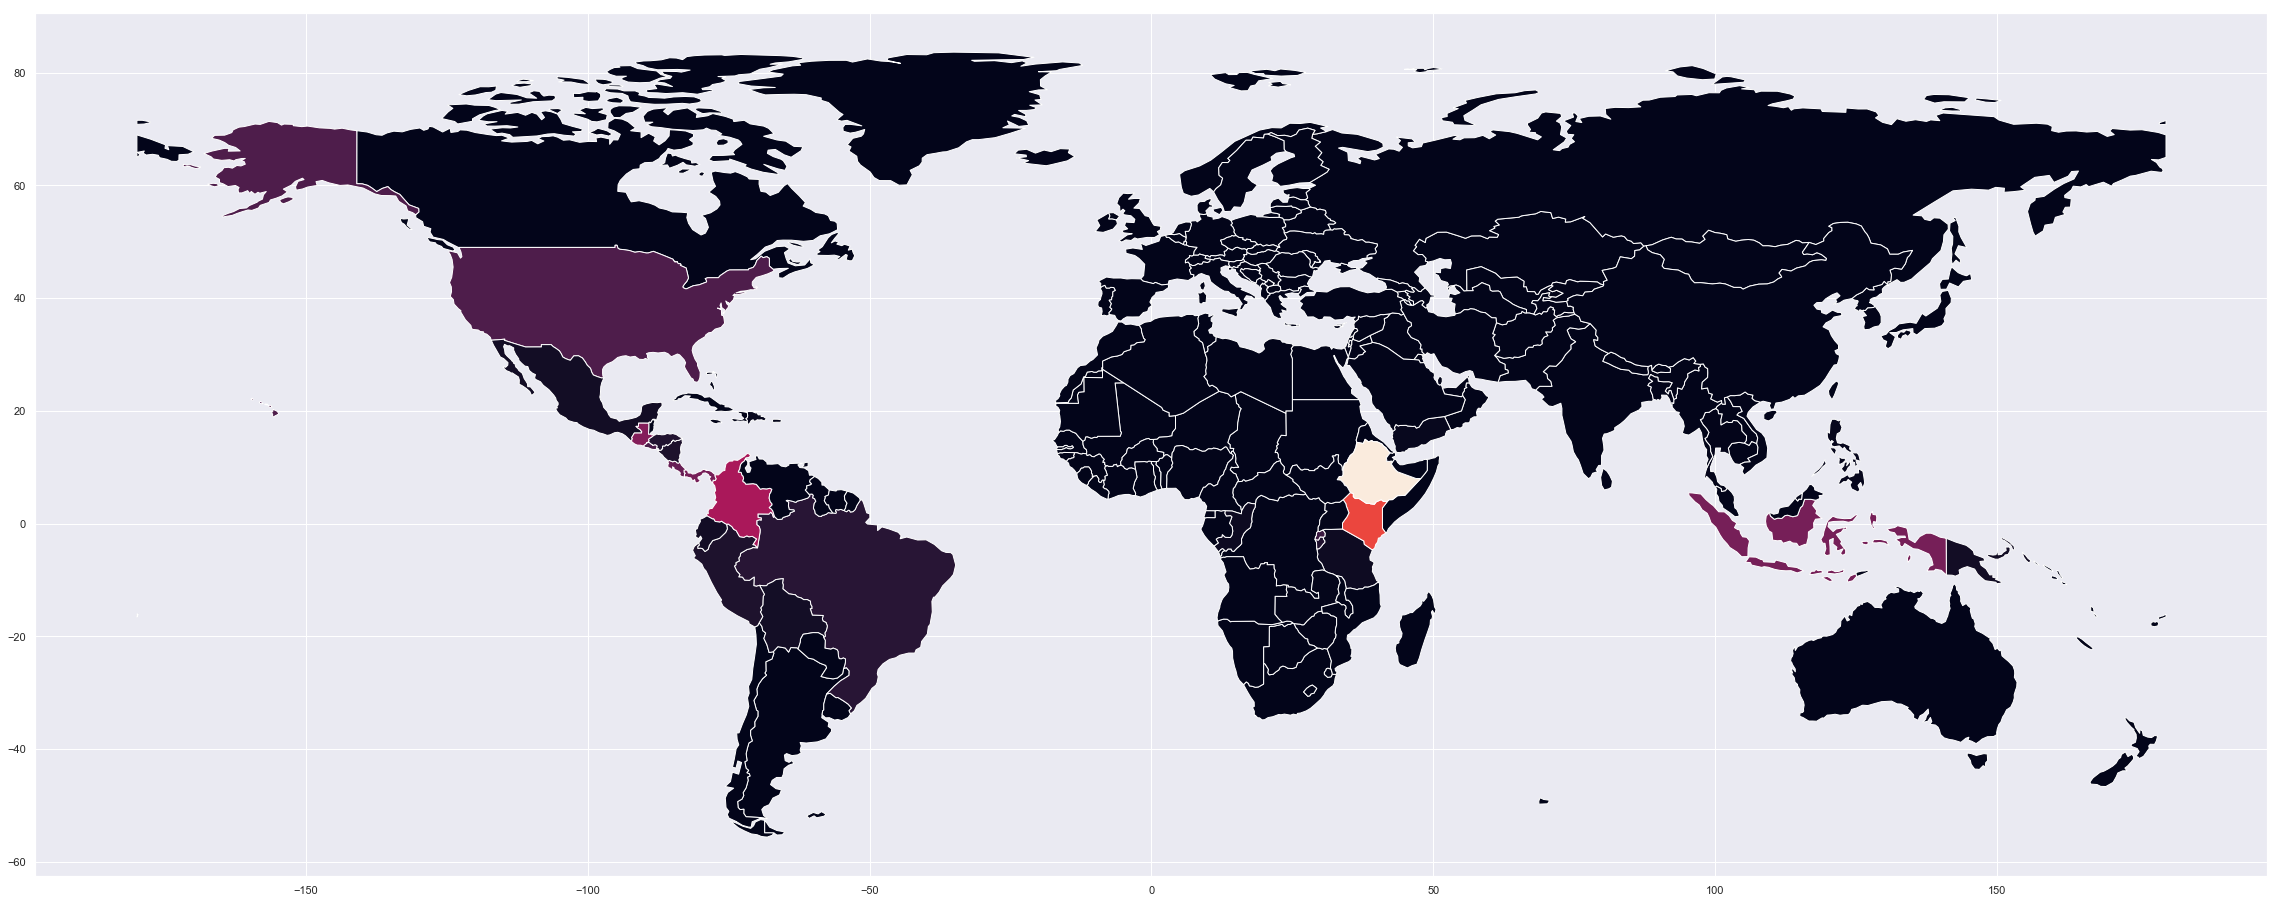

In [47]:
world.plot(figsize = (40,18), column='number of growers');

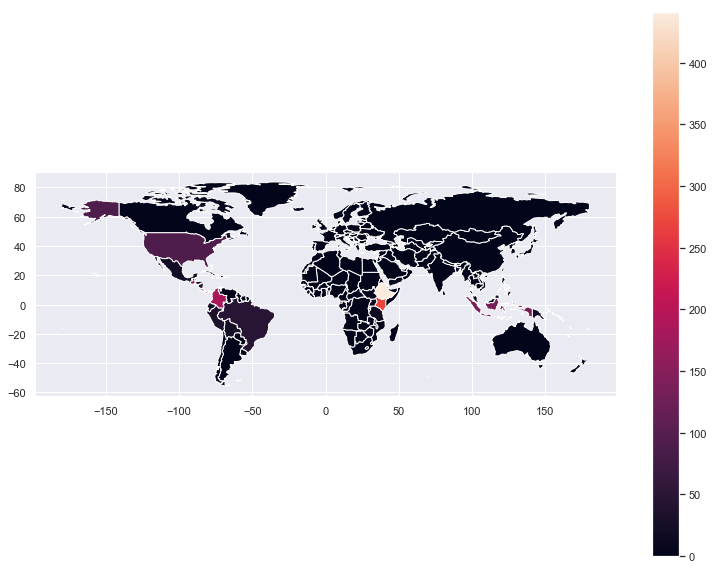

In [48]:
fig, ax = plt.subplots(1,1)
world.plot(column='number of growers', ax=ax, legend = True)

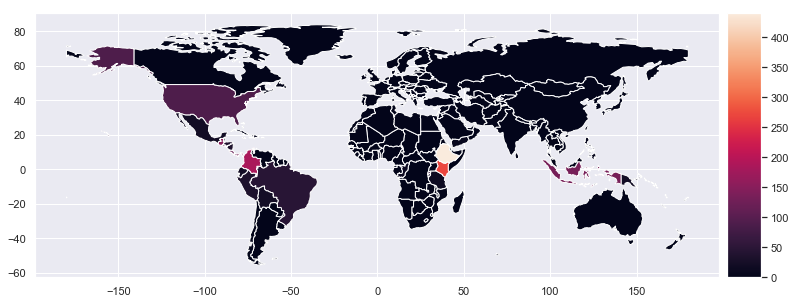

In [49]:
fig, ax = plt.subplots(1,1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(column='number of growers', ax=ax, cax=cax, legend = True)

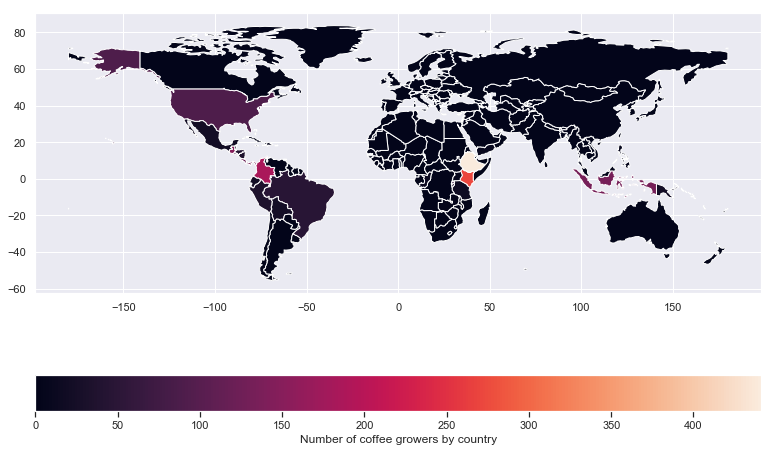

In [50]:
fig, ax = plt.subplots(1,1)
world.plot(column='number of growers', ax=ax, legend = True,
          legend_kwds={'label': 'Number of coffee growers by country',
                        'orientation': 'horizontal'})

## Attempt to get rid of distortion

In [51]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(0.5, 1.0, 'World Map')

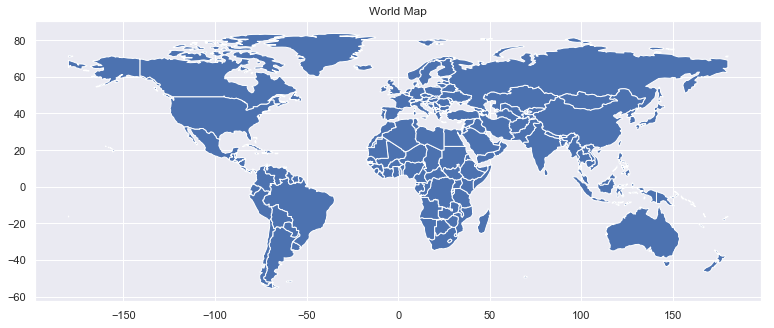

In [52]:
ax = world.plot()
ax.set_title("World Map")

In [53]:
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]

In [54]:
world = world.to_crs("EPSG:3395")

Text(0.5, 1.0, 'Flat World')

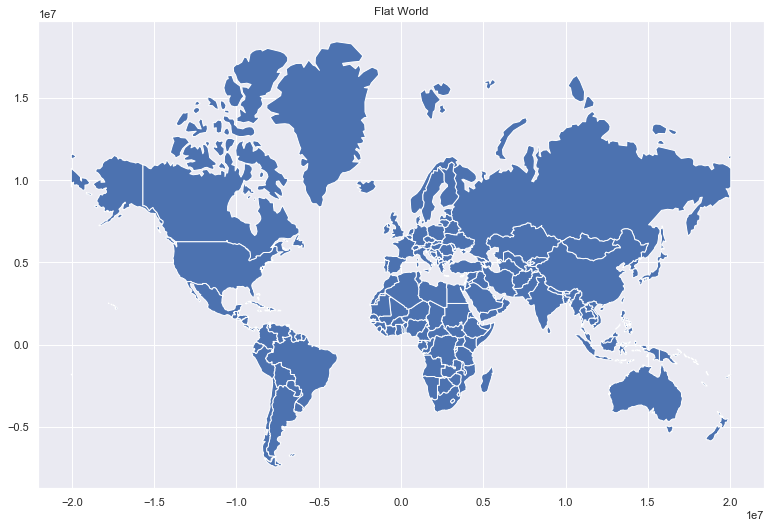

In [55]:
ax = world.plot()
ax.set_title("Flat World")

Text(0.5, 1.0, 'Flat World')

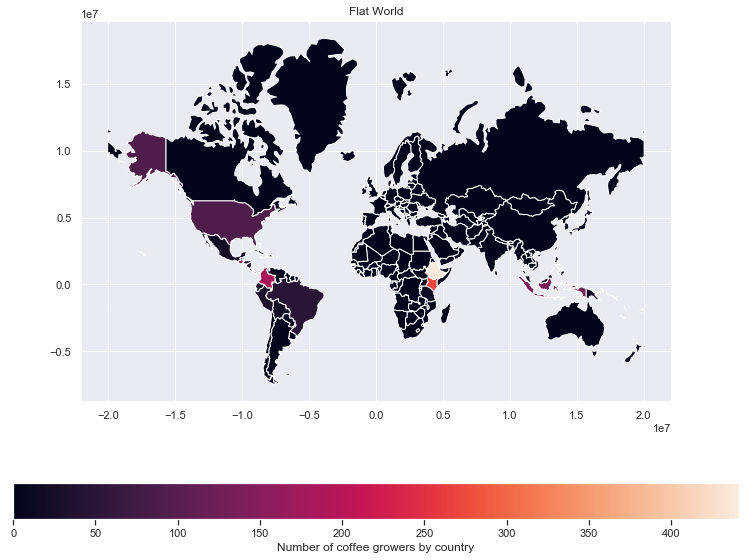

In [56]:
fig, ax = plt.subplots(1,1)

ax = world.plot(column='number of growers', ax=ax, legend = True,
          legend_kwds={'label': 'Number of coffee growers by country',
                        'orientation': 'horizontal'})
ax.set_title("Flat World")

Text(0.95, 0.01, 'World Blend: count of 93')

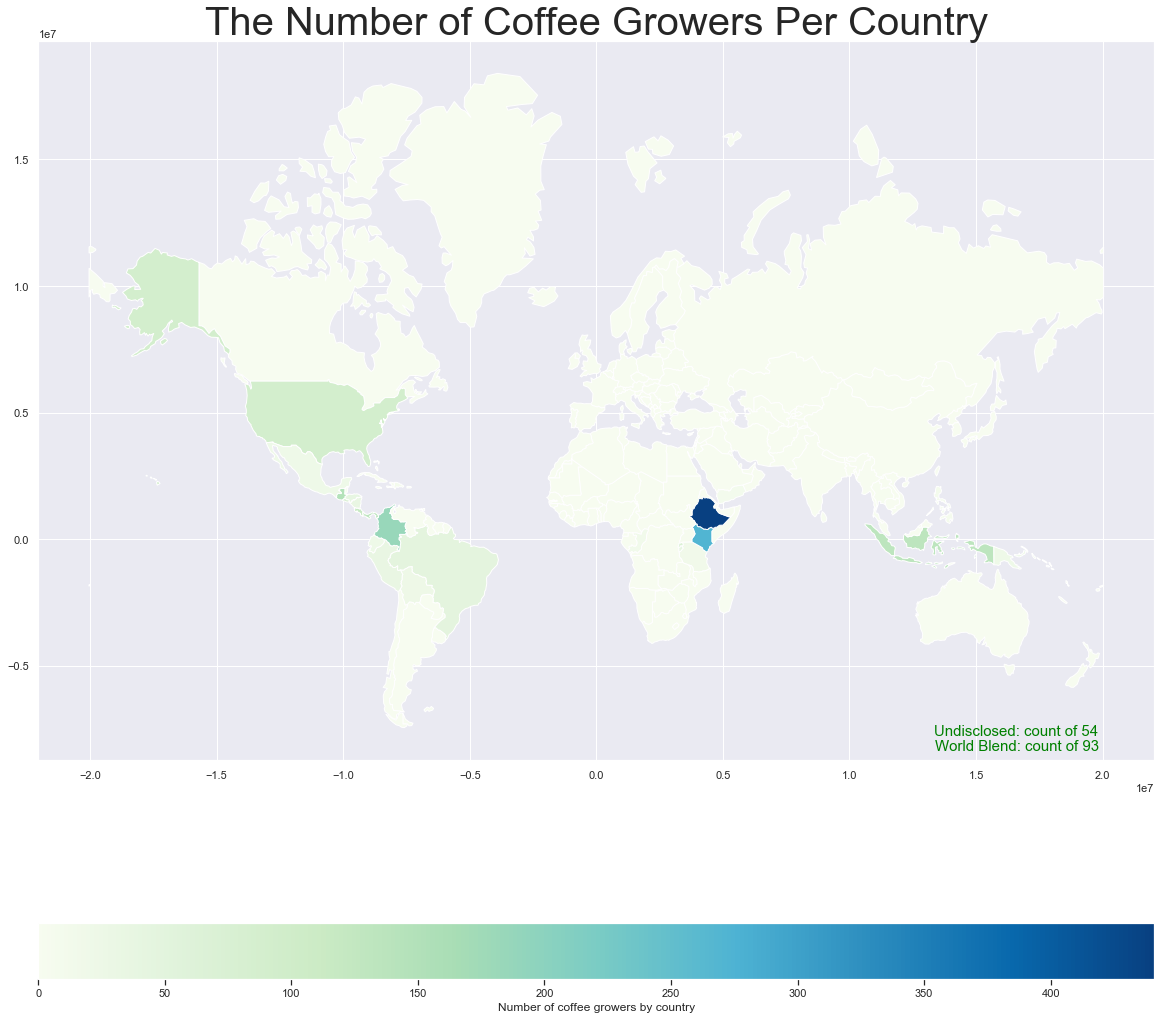

In [57]:
# To change colors: https://matplotlib.org/tutorials/colors/colormaps.html
# To add the text: https://matplotlib.org/3.1.0/tutorials/text/text_intro.html

fig, ax = plt.subplots(1,1, figsize=(20,20))

ax = world.plot(column='number of growers', cmap= 'GnBu', ax=ax,legend = True,
          legend_kwds={'label': 'Number of coffee growers by country',
                        'orientation': 'horizontal'})

ax.set_title("The Number of Coffee Growers Per Country", fontsize = 40)

ax.text(0.95, 0.03, 'Undisclosed: count of 54',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)

ax.text(0.95, 0.01, 'World Blend: count of 93',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)

Text(0.95, 0.01, 'World Blend: count of 93')

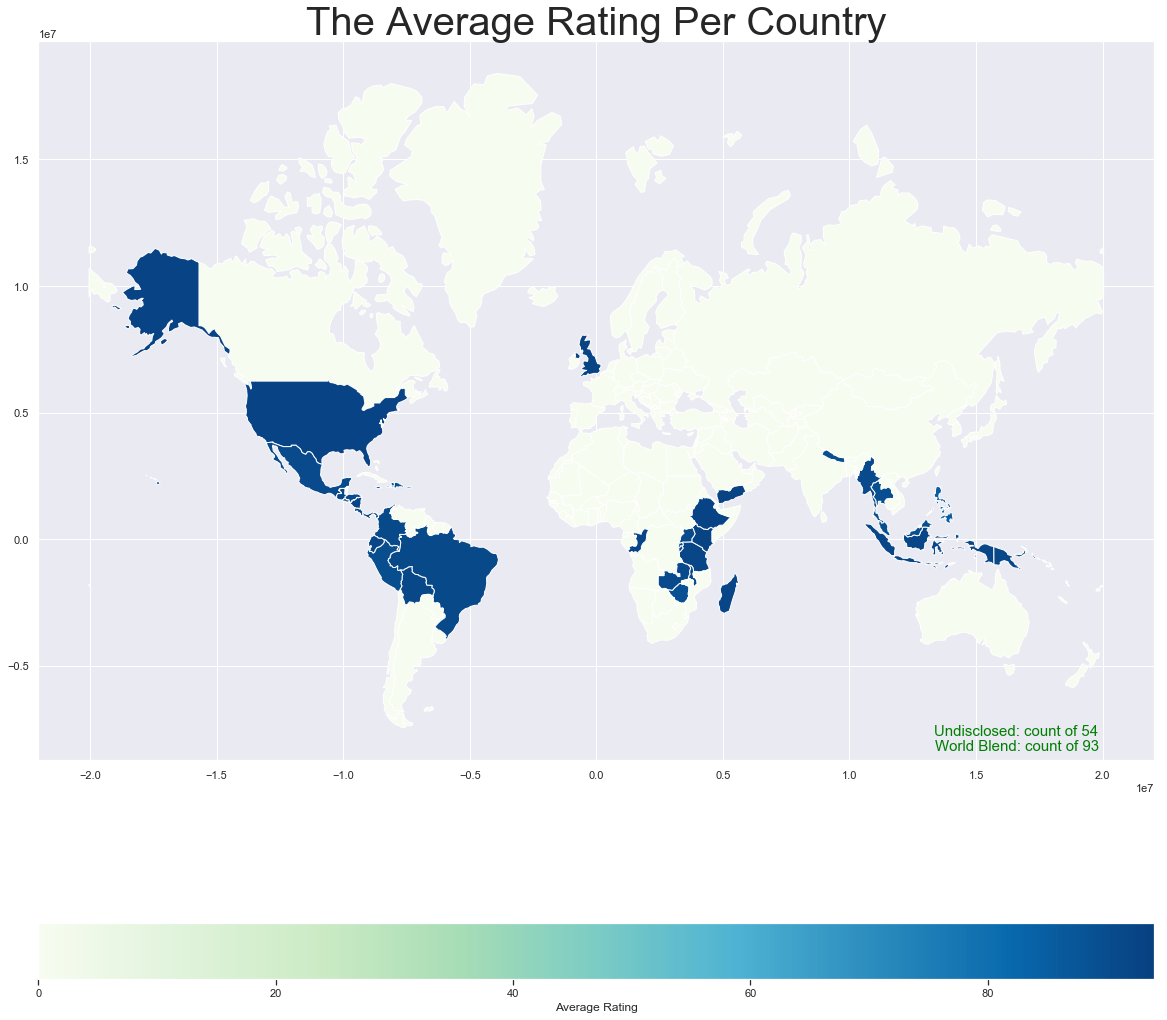

In [58]:
fig, ax = plt.subplots(1,1, figsize=(20,20))

ax = world.plot(column='mean rating', cmap= 'GnBu', ax=ax,legend = True,
          legend_kwds={'label': 'Average Rating',
                        'orientation': 'horizontal'})

ax.set_title("The Average Rating Per Country", fontsize = 40)

ax.text(0.95, 0.03, 'Undisclosed: count of 54',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)

ax.text(0.95, 0.01, 'World Blend: count of 93',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)

# Code Holding 

In [59]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html
    
# fig = plt.figure(figsize=(8, 6), edgecolor='w')
# m = Basemap(projection='cyl', resolution=None,
#             llcrnrlat=-90, urcrnrlat=90,
#             llcrnrlon=-180, urcrnrlon=180, )
# draw_map(m)

In [60]:
# Phoenix[['RegionName','growth2']].sort_values(by='growth2',ascending=False).plot.bar(x='RegionName', y='growth2',figsize=(40,30))
# plt.title('ROI Growth (post 2008 Crash) for Zip Codes in Phoenix, AZ', fontsize=30)
# plt.legend('')
# plt.xlabel('zipcodes', fontsize =20)
# plt.ylabel('Growth percentage', fontsize=20)

# result.plot.bar(x='RegionName', y='growth2', figsize=(10,10))
# plt.title('Top 13 Zipcodes in US: CA, AZ and NV', fontsize=25)
# plt.xlabel('zip codes')
# plt.legend('')
# plt.ylabel('Growth percentage')

# fig, ax = plt.subplots(figsize=(25,15))
# plt.bar(CA_x,CA_y, color = '#1c3290', label = "CA mean: {}".format(CA_mean))
# plt.bar(NV_x, NV_y, color = "#901c32", label = "NV mean: {}".format(NV_mean))
# plt.bar(AZ_x, AZ_y, color = "#32901c", label = "AZ mean: {}".format(AZ_mean))
# plt.title("Top 13 US Zip Codes", fontsize = 35)
# plt.xlabel("Zip Codes", fontsize=30)
# plt.ylabel("Growth % Since 2011", fontsize = 25)
# plt.legend()
# plt.show()